## <center> Video Links </center> ##
Duc Vo: https://www.youtube.com/watch?v=olezTBXWRJg

Ty Gehrke: 
* Part 1: https://www.loom.com/share/3e6c68ddab244721aa8d5d7997c73e2b?sid=57e0e9ac-57fe-45c7-9bef-b1563f882df2
* Part 2: https://www.loom.com/share/81708c0dacf148328b97c48ac536b8e5?sid=7fa6fab9-b81c-4922-a174-0aeddf1fcc55

# <center> Principal Component Analysis Project </center> #
File created by Ty Gehrke and Duc Vo

This project aims to leverage data analysis techniques, specifically Principal Component Analysis (PCA), to identify crucial predictors of employee performance within an organization. By utilizing the "IBM HR Analytics Employee Attrition & Performance" dataset ([Data](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)), the project seeks to uncover patterns and relationships among various performance indicators, ultimately guiding the company's policies for rewarding employees and implementing professional development initiatives. The project involves several key steps, including data preprocessing to ensure data quality, PCA analysis to reduce the dimensionality of the dataset and identify significant predictors, and model validation to assess the performance and generalization ability of the developed model. Through thorough analysis and interpretation of the findings, the project aims to provide actionable insights to support decision-making processes within the organization, aligning with the overarching goal of optimizing employee performance and organizational success.


## <center> Performance and Predictors </center> ##

In the context of this project, "performance" refers to the effectiveness and productivity of employees within an organization. It encompasses various aspects such as job satisfaction, efficiency, quality of work, meeting targets, and overall contribution to the company's objectives.

Predictors of performance are the factors or attributes that influence an individual's performance within the organization. These predictors can be diverse and may include both personal characteristics (such as skills, education, experience) and environmental factors (such as work environment, management style, company policies).

The goal of the project is to identify the most important predictors of performance among the set of employee performance indicators. By doing so, the company aims to develop policies for rewarding employees (such as bonuses) and for guiding professional development initiatives.

## <center> Importing Libraries </center> ##

In [456]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## <center> Data Preprocessing </center> ##

Data preprocessing is a critical step in any data analysis project, as it ensures the quality and integrity of the data before conducting further analysis. In the context of this project utilizing the "IBM HR Analytics Employee Attrition & Performance" dataset, the preprocessing steps involve several key procedures to prepare the data for analysis.

The primary preprocessing step undertaken is the removal of empty rows from the dataset. This procedure involves identifying and eliminating any rows that contain missing or null values across the entire dataset. Empty rows can introduce inconsistencies and inaccuracies into the analysis process, potentially skewing results and interpretations. By dropping these rows, we ensure that the dataset remains clean and complete, enabling more accurate analysis and interpretation of the data. It also will be necessary for the Assumptions Verification, as the VIF calculations will not work with empty values.

The decision to drop empty rows is made after careful consideration of the impact on the dataset and the analysis objectives. In this case, dropping empty rows ensures that the dataset is consistent and reliable, providing a solid foundation for subsequent analyses aimed at identifying predictors of employee performance.

The secondary preprocessing objective is to drop columns that have no impact on the data. This is done after careful consideration of the distribution of the data in each column. The graphs in the code below (In 345), show that some columns only have one value. For example, 'Over18' is all 1's (yes), and therefore unnecessary to list.

## <center> Pipeline Used </center> ##

The pipeline utilized in this project involves a systematic series of steps aimed at analyzing the "IBM HR Analytics Employee Attrition & Performance" dataset to identify the most important predictors of employee performance. The pipeline encompasses several stages, each serving a specific purpose in the analysis process.

* Data Acquisition: The first stage involves acquiring the dataset "IBM HR Analytics Employee Attrition & Performance" from the specified source. This dataset contains information about various employee attributes and performance indicators.
* Data Preprocessing: Following data acquisition, the dataset undergoes preprocessing to ensure its cleanliness and integrity. This includes handling missing values, removing duplicates, and addressing any inconsistencies in the data. In this project, a key preprocessing step involves dropping empty rows to eliminate any instances of missing or null values.
* Principal Component Analysis (PCA): The centerpiece of the analysis pipeline is the application of Principal Component Analysis (PCA) to identify the most important predictors of employee performance. PCA is a dimensionality reduction technique that transforms the original dataset into a new set of orthogonal variables called principal components. By examining the variance explained by each principal component, we can determine the relative importance of different performance indicators in predicting overall performance.
* Feature Selection: Based on the results of PCA, a feature selection process is employed to identify the subset of performance indicators that contribute most significantly to employee performance. This involves evaluating the loadings of each principal component and selecting the performance indicators with the highest loadings as the most important predictors.
* Analysis and Reporting: Finally, the selected performance indicators are analyzed to gain insights into their relationship with employee performance. This analysis involves visualizing the data, conducting statistical tests if necessary, and interpreting the findings in the context of the project objectives. The results are then documented in a comprehensive technical report, including code, comments, outputs, plots, and analysis, addressing the problem statement, algorithm of the solution, analysis of the findings, and references.

By following this pipeline, we aim to systematically explore the dataset, identify the most important predictors of employee performance, and provide actionable insights to guide the company's policies for awarding rewards and professional development.

In [457]:
# Assuming the dataset is a CSV file
df = pd.read_csv('Employee_Data.csv', delimiter = ',')

# Replace 'empty' with actual None values
df.replace('empty', pd.NA, inplace=True)

# Drop rows with any NA values
df.dropna(inplace=True)
df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


In [458]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## <center> Normality Assumption </center> ##

The following code displays the histograms of each feature, to check their normality. 

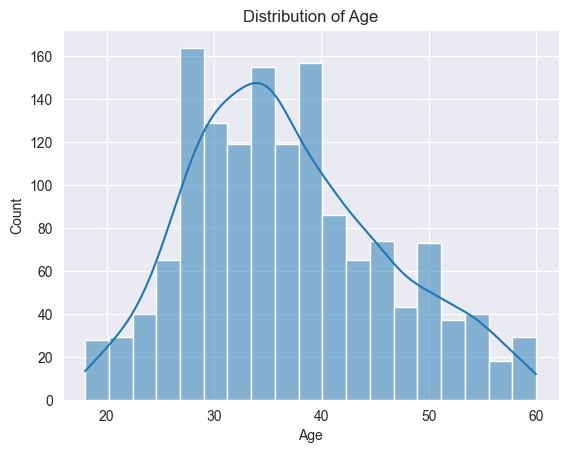

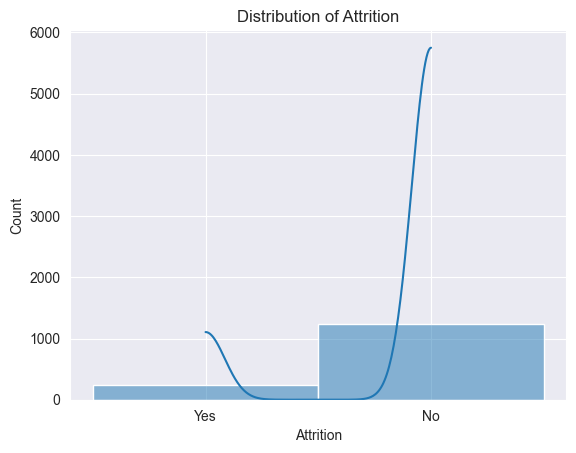

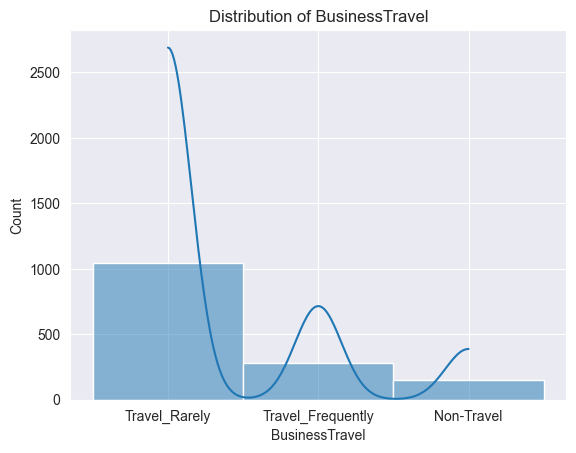

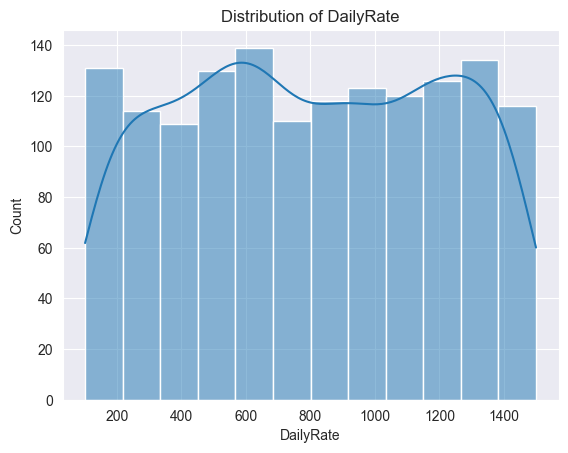

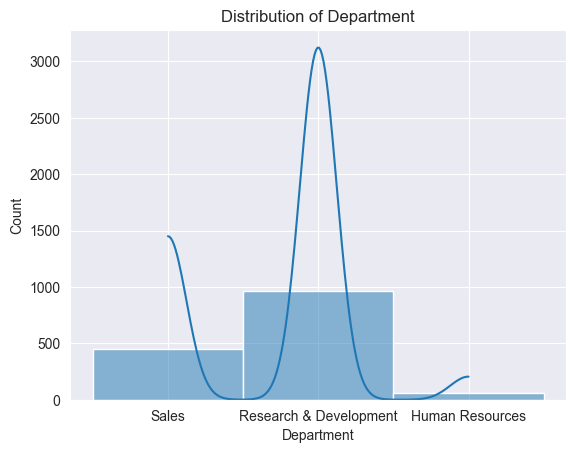

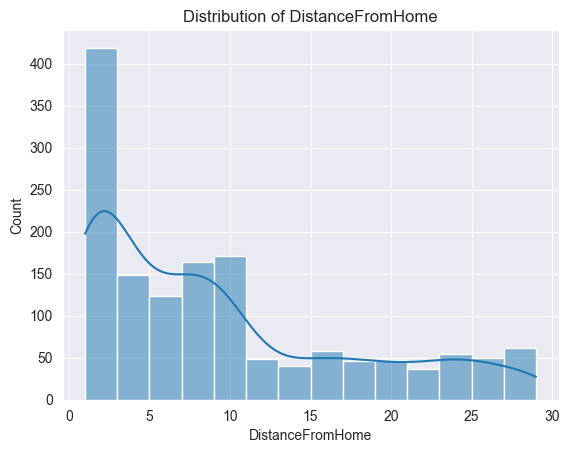

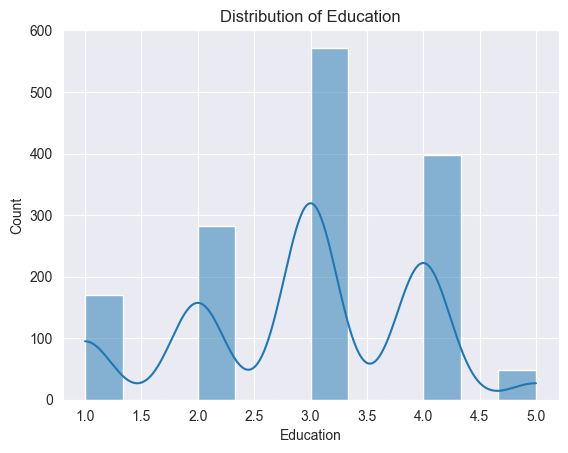

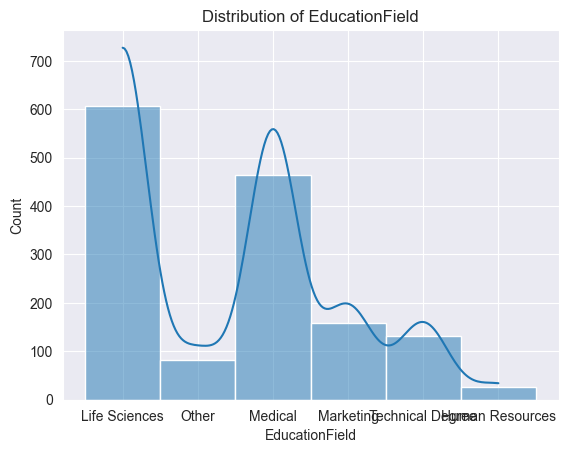

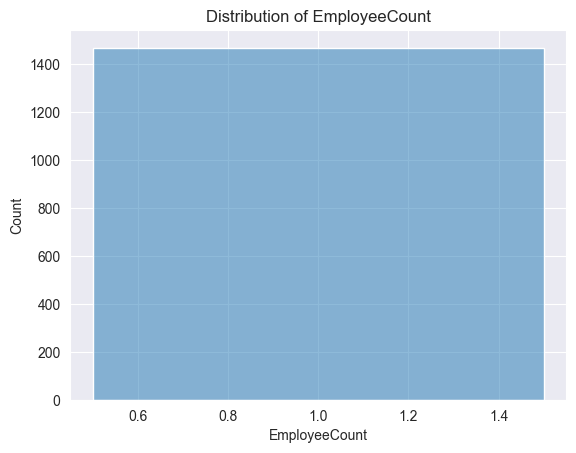

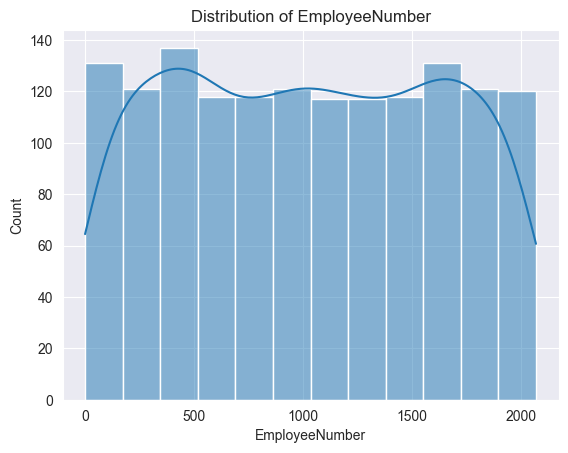

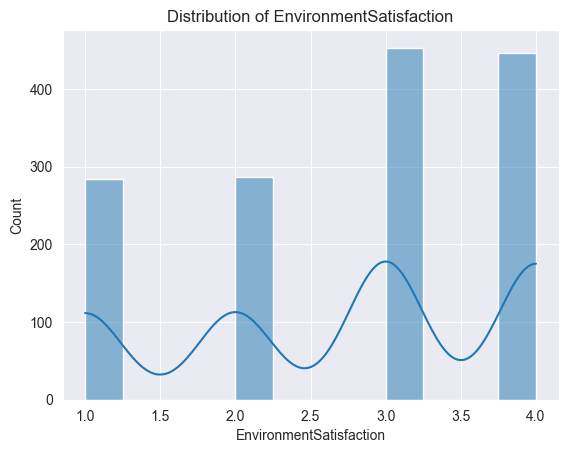

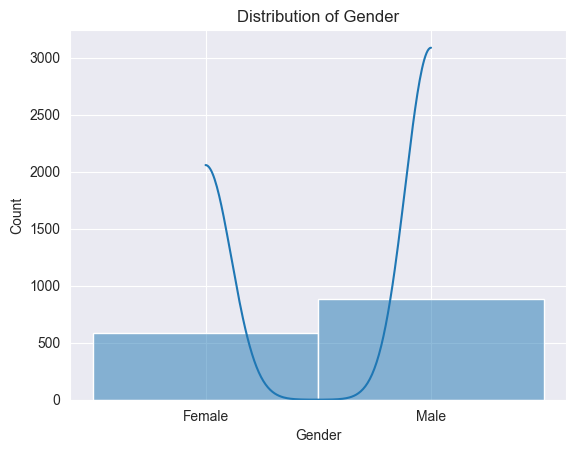

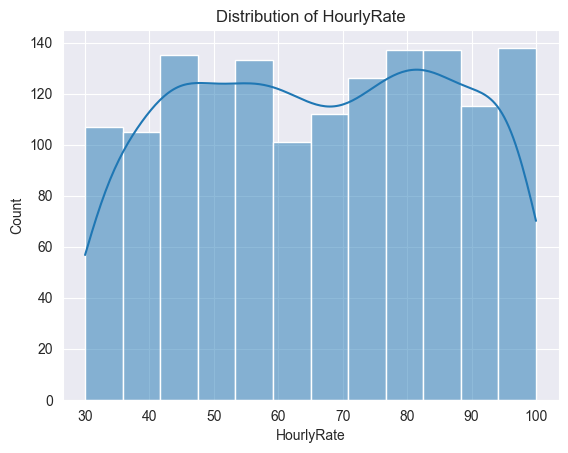

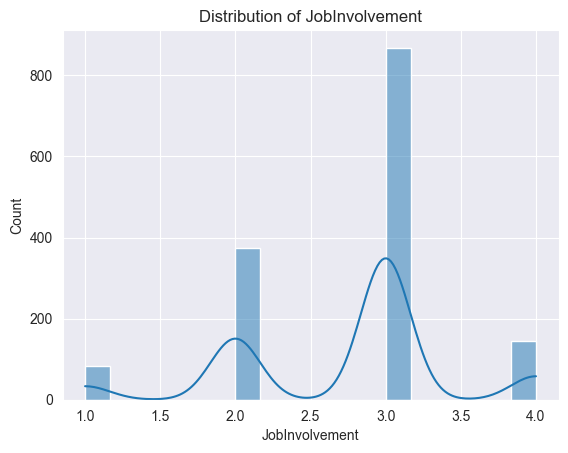

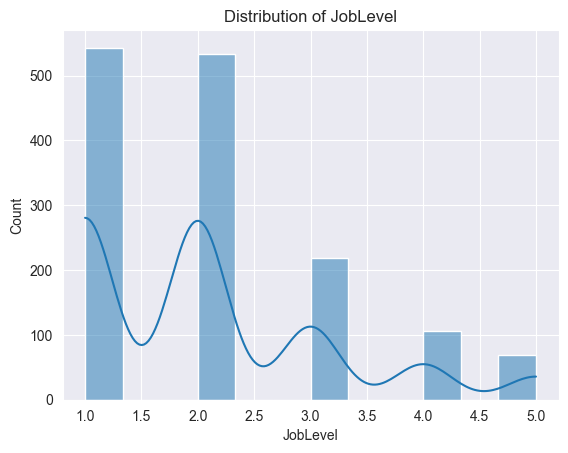

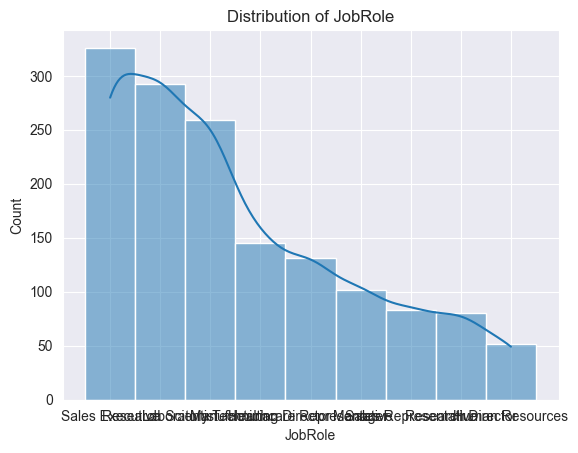

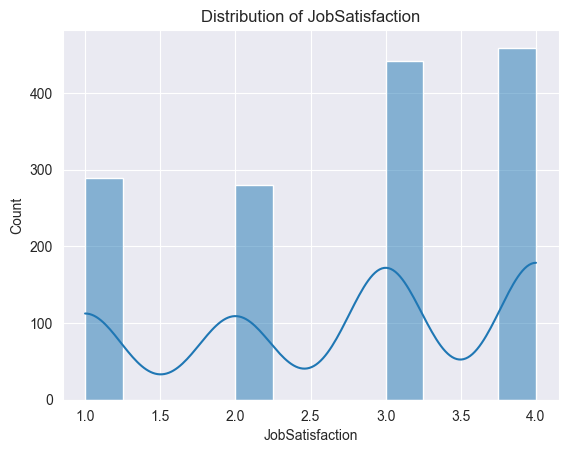

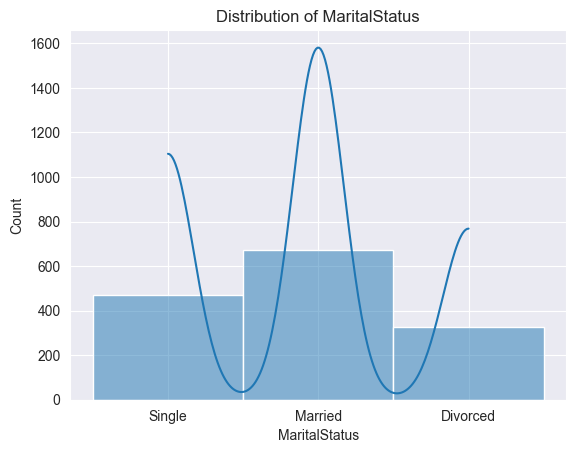

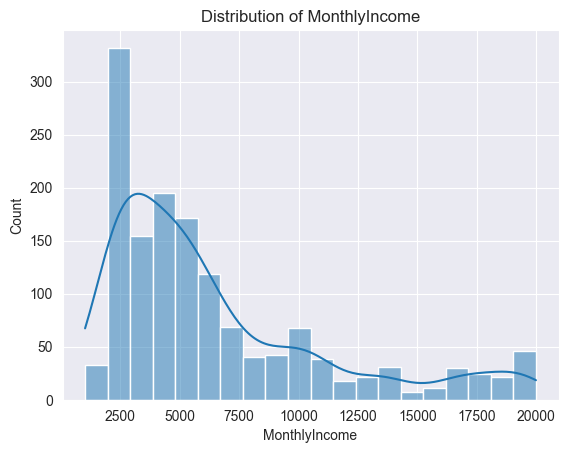

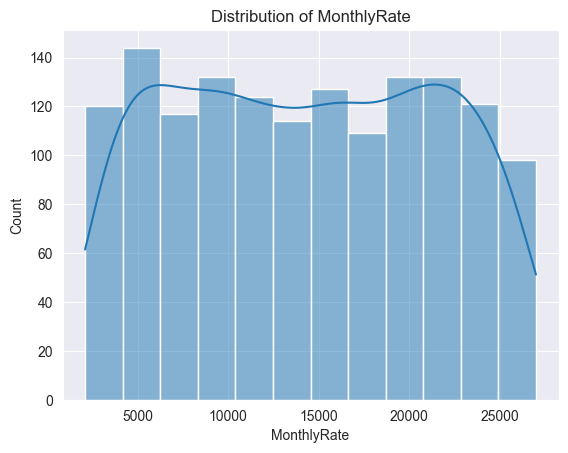

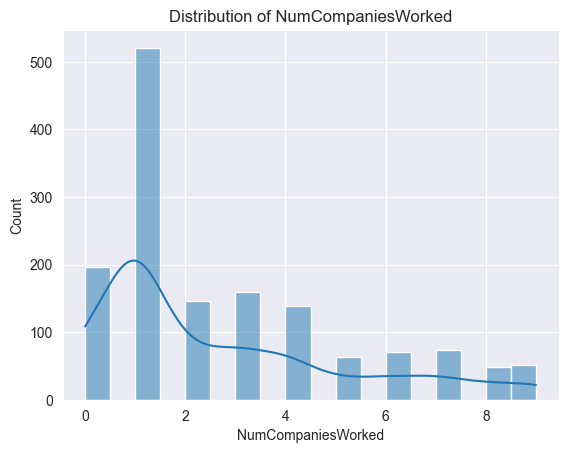

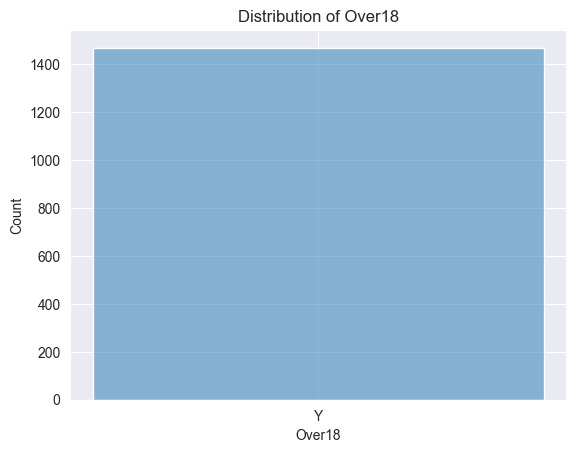

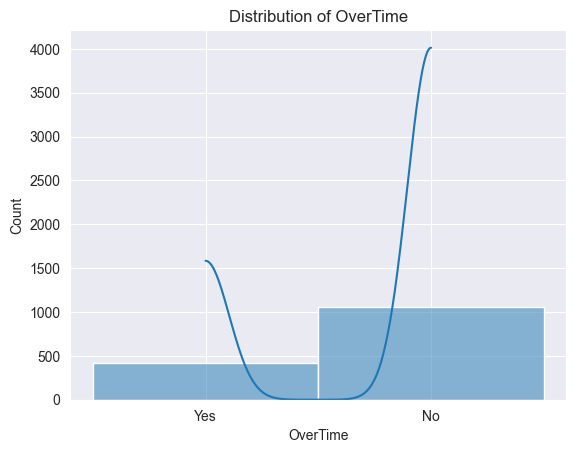

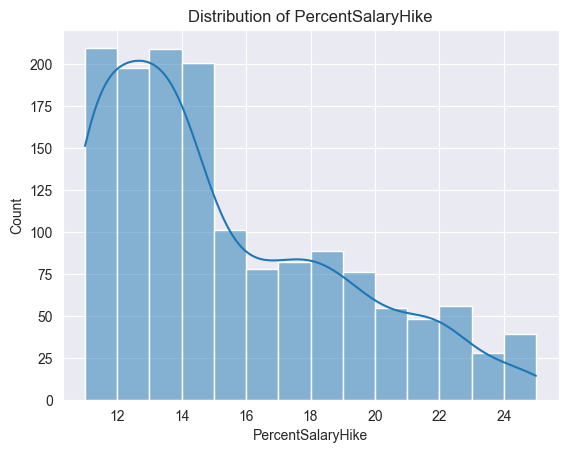

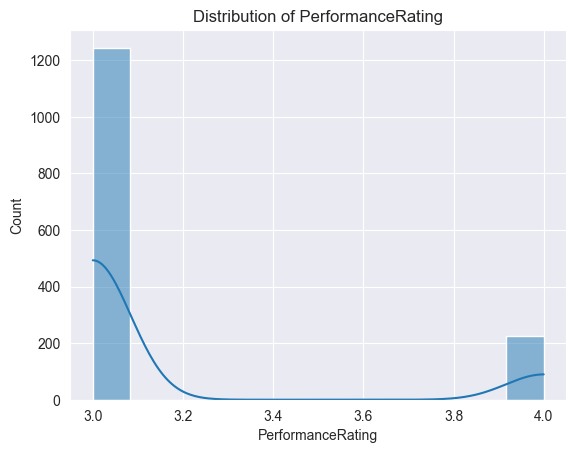

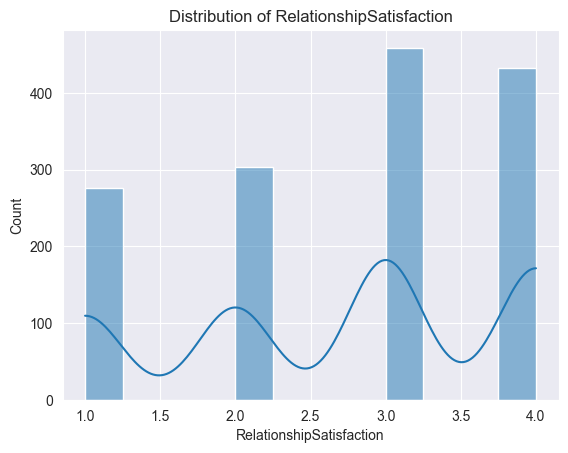

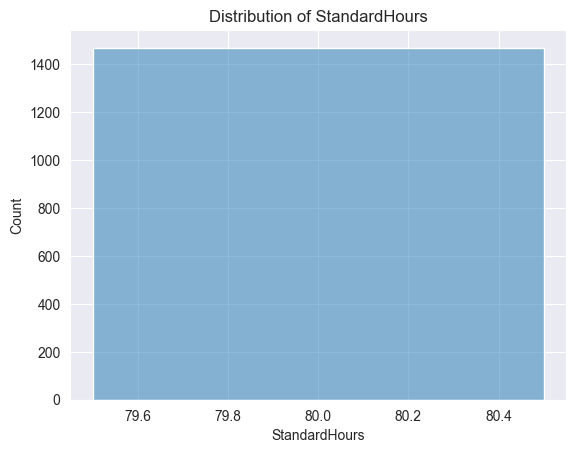

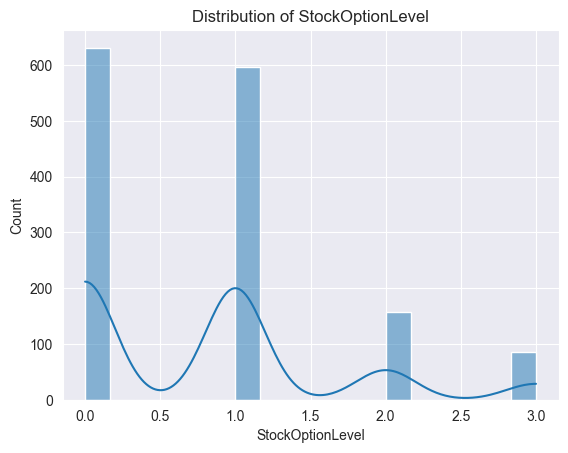

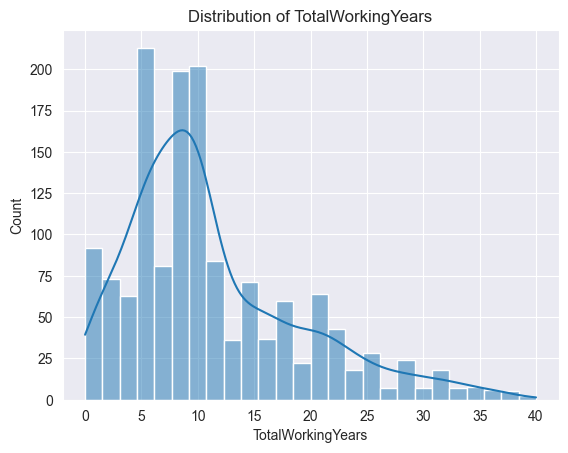

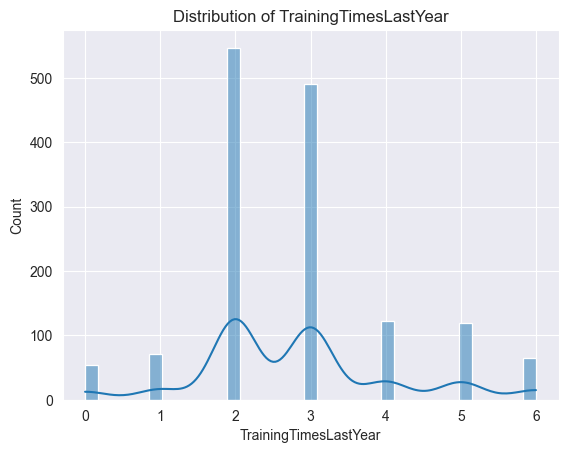

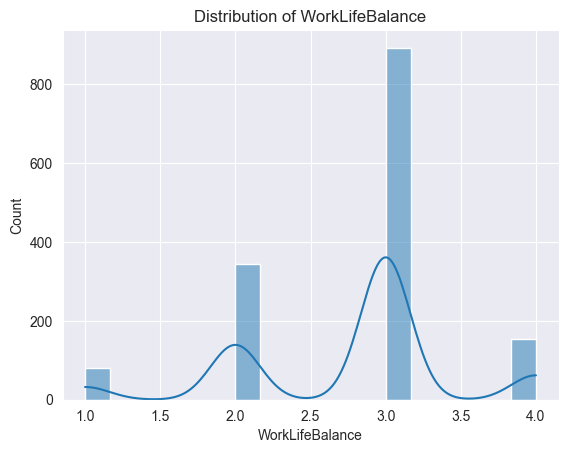

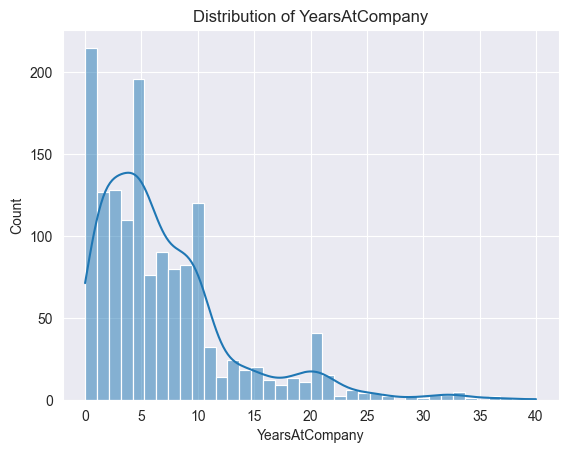

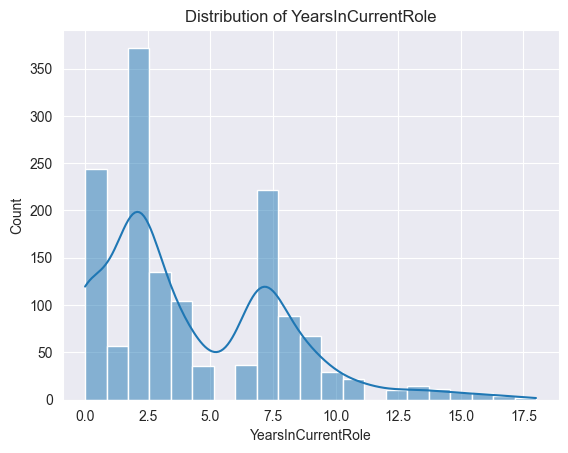

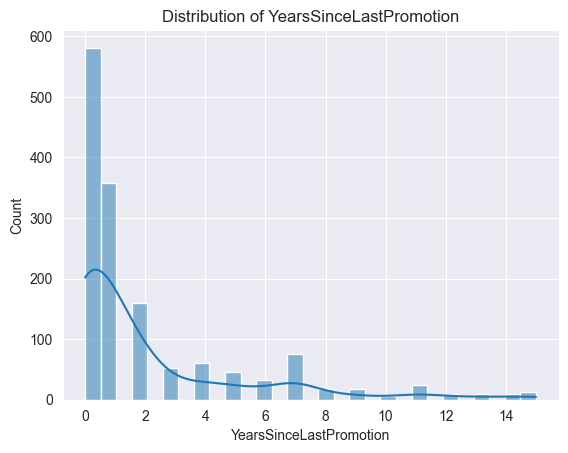

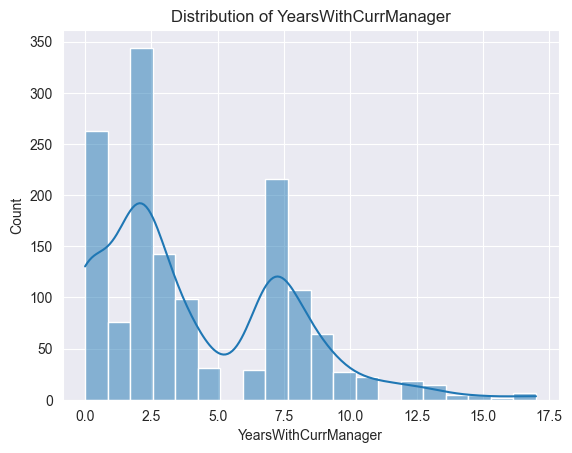

In [459]:
for feature in df.columns:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## <center> Dropping Unneeded Columns </center> ##

The columns that only had one value were 'Over18', with only yes, 'EmployeeCount', with only '1' for all rows, and 'StandardHours' with '80' for every row. 'EmployeeNumber' was also dropped,  because it had no logical connection to the performance of the employee. 

In [460]:
# drop because not needed
X = df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], inplace=True, axis=1)

## <center> Train Test Split </center> ##

The following code uses LabelEncoder() to change columns with words into numbers to use in the analysis. For example, the 'Attrition' column had 'yes' or 'no' as its data, and LabelEncoder() changes that into 0 or 1. The data is then split into a 70-30 training and testing sets, and StandardScalar() is used to standardize the data. 

In [461]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <center> Shapiro </center> ##
In the provided code snippet, the Shapiro-Wilk test for normality is being applied to each feature (performance indicator) in the dataset represented by the variable X. This test is used to assess whether a given sample of data follows a normal distribution or not.

By performing this test for each performance indicator, the code helps assess the normality assumption of the data. This information is valuable in subsequent analyses, such as regression modeling, where assumptions about the distribution of data may influence the choice of statistical methods and interpretation of results.

In [462]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
for feature in X.columns:
    stat, p = shapiro(X[feature])
    print(f'{feature}: Statistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


Age: Statistics=0.9774491149124374, p=2.036924313471394e-14
Sample does not look Gaussian (reject H0)
Attrition: Statistics=0.44207826629292546, p=2.407965501396723e-55
Sample does not look Gaussian (reject H0)
BusinessTravel: Statistics=0.6125229475457832, p=2.7948156536101564e-49
Sample does not look Gaussian (reject H0)
DailyRate: Statistics=0.9571425300065493, p=2.2956900753776384e-20
Sample does not look Gaussian (reject H0)
Department: Statistics=0.6972359880219289, p=2.209391820644181e-45
Sample does not look Gaussian (reject H0)
DistanceFromHome: Statistics=0.8615877536080814, p=4.080847148972682e-34
Sample does not look Gaussian (reject H0)
Education: Statistics=0.8954062103650657, p=1.7257118214899497e-30
Sample does not look Gaussian (reject H0)
EducationField: Statistics=0.8479700624145197, p=2.2296418978789248e-35
Sample does not look Gaussian (reject H0)
EnvironmentSatisfaction: Statistics=0.8489657036847695, p=2.7378881881962794e-35
Sample does not look Gaussian (reject 

## <center> Covariance Matrix and EigenValues </center> ##

In [463]:
# Calculate the Covariance Matrix
cov_matrix = np.cov(X.T)
print("Covariance matrix:\n", cov_matrix)


# Calculate Eigenvalues and Eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigen_values)
print("Eigenvectors:\n", eigen_vectors)

# Explained Variance
tot = sum(eigen_values)
var_exp = [(i / tot) * 100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Explained Variance:\n", var_exp)
print("Cumulative Explained Variance:\n", cum_var_exp)


Covariance matrix:
 [[ 8.34550488e+01 -5.35018963e-01  1.50468411e-01  2.44502253e+01
  -1.53722973e-01 -1.24872767e-01  1.94639048e+00 -4.97118221e-01
   1.01319330e-01 -1.62559564e-01  4.51042173e+00  1.93840967e-01
   5.15327563e+00 -2.75333398e+00 -4.92852280e-02 -6.33835781e-01
   1.67696002e+03  1.06703802e+02  6.83773866e+00  1.15517521e-01
   1.21488541e-01  5.28775649e-01  2.91977049e-01  4.83329897e+01
  -2.31093390e-01 -1.38694933e-01  1.71307076e+01  7.04675030e+00
   6.37374307e+00  6.58733184e+00]
 [-5.35018963e-01  1.35323210e-01  1.80603215e-05 -5.27892083e+00
   1.24241119e-02  2.32384935e-01 -1.18197858e-02  1.31479140e-02
  -4.15651352e-02  5.30973451e-03 -5.11940651e-02 -3.40325919e-02
  -6.88598380e-02  6.08132702e-02 -4.19819119e-02  4.35295425e-02
  -2.80530515e+01  2.31381337e+00  3.99674914e-02  4.07968770e-02
  -1.81464553e-02 -1.82450925e-02 -4.29877329e-02 -4.90769786e-01
  -2.82088329e-02 -1.66168850e-02 -3.04904072e-01 -2.13977300e-01
  -3.91408844e-02 -2.

## <center> Plotted Variances </center> ##

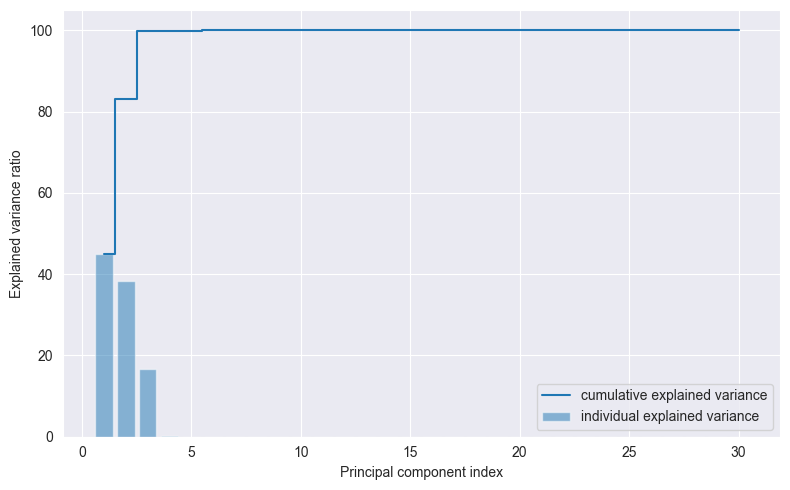

In [464]:
# Plot explained variances
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## <center> Elbow Method </center> ##

The elbow method implemented in the following code is used to determine the optimal number of Principal Components to use in the analysis. The graph shows a clear elbow at 3, where subsequent components do not have much more of an impact on how much variance is explained by the PCA. This is also supported by the cumulative variances found in the code snippets above, where the cumulative variance of the third principal component explains 99.82% of the variance. 

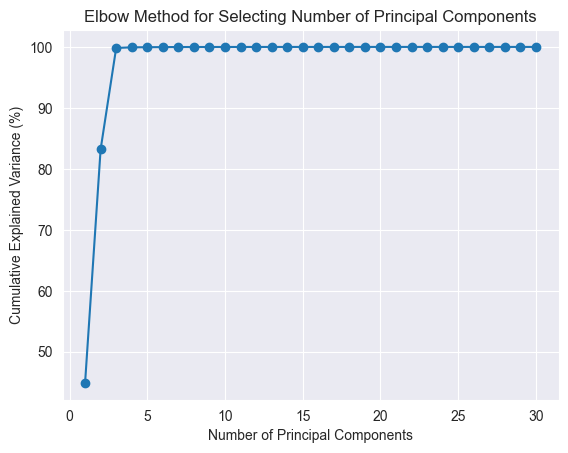

In [465]:
# Step 6: Select Principal Components
# Use the elbow method to decide how many principal components to retain
plt.plot(range(1, 31), cum_var_exp, marker='o')
plt.title('Elbow Method for Selecting Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.show()


## <center> PCA and Confusion Matrix </center> ##

The PCA is done with 3 components, as determined by the elbow method, and is applied to the data. A random forest classifier is then used to make predictions at a max depth of 10. 

The confusion matrix and accuracy score was then run on the predictions, leading to an accuracy of 0.8367, or 83.67%. This is an excellent accuracy for the model, and shows that it is able to make good predictions about an employee's performance in 83% of all cases. 

The model also has a precision of 0.84, which indicates that the model performs well in terms of making positive predictions accurately, while a recall of 0.99 indicates that the model effectively captures nearly all positive instances in the dataset. 

In [466]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [467]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 10, random_state = 0)
classifier.fit(X_train_pca, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_pca)

In [468]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ', accuracy_score(y_test, y_pred) )
print(classification_report(y_test, y_pred))

[[369   3]
 [ 69   0]]
Accuracy:  0.8367346938775511
              precision    recall  f1-score   support

           3       0.84      0.99      0.91       372
           4       0.00      0.00      0.00        69

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441


## <center> Scree Plot </center> ##

The scree plot is a line plot that displays the explained variance of each principal component against its corresponding component number. In PCA, principal components are ordered by the amount of variance they explain, with the first component explaining the most variance, the second component explaining the second-most variance, and so on. The scree plot visually represents this distribution of explained variance, typically displaying a steep decrease in explained variance as we move from the first component to subsequent components.

The scree plot is crucial in making informed decisions about dimensionality reduction. Retaining too few principal components may result in a loss of important information, while retaining too many components may introduce noise and overfitting. Therefore, the scree plot provides a visual guide for selecting an appropriate number of principal components, balancing the trade-off between dimensionality reduction and information retention.

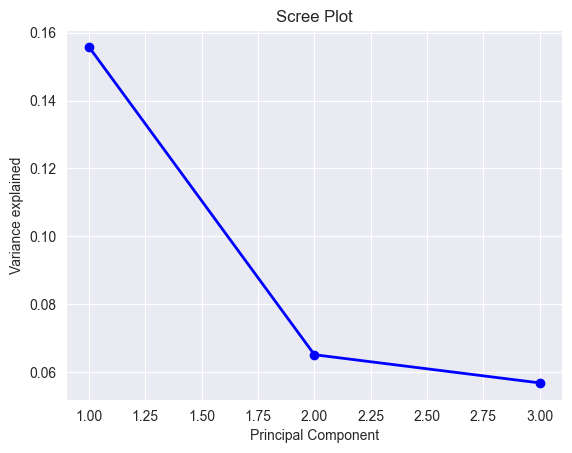

In [469]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance explained')
plt.show()

## <center> Variance Inflation Factor </center> ##

In the context of Principal Component Analysis (PCA), multi-collinearity refers to the situation where the principal components are highly correlated with each other. High multi-collinearity can lead to instability in the estimation of the principal components and make the interpretation of the results challenging.

The following code displays VIF scores, of which scores above a certain determined range indicate high collinearity. We chose 10 as our cut-off point, as we had multiple scores of 6, which would all be taken out if the cut-off was 5. There are 6 features with a VIF score of over 10, which are 'Age', 'Department', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', and 'YearsAtCompany'. These are not very surprising, as there are multiple variables that deal with income, and years worked. 'JebLevel' and 'Department' also have other variables that are similar, like 'JobRole', and may be affected by 'Education' too. 'Age' is also unsurprising, as it would correlate to the number of years worked. 

In [470]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Assuming that you've already standardized your data if necessary
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                     feature        VIF
0                        Age  10.680989
1                  Attrition   1.490691
2             BusinessTravel   6.411575
3                  DailyRate   3.984832
4                 Department  13.186652
5           DistanceFromHome   2.046547
6                  Education   4.682993
7             EducationField   3.796557
8    EnvironmentSatisfaction   3.462460
9                     Gender   2.456680
10                HourlyRate   4.040747
11            JobInvolvement   6.602791
12                  JobLevel  12.710519
13                   JobRole   8.119521
14           JobSatisfaction   3.417179
15             MaritalStatus   5.485002
16             MonthlyIncome  20.559774
17               MonthlyRate   3.860964
18        NumCompaniesWorked   2.782969
19                  OverTime   1.559711
20         PercentSalaryHike   2.295902
21  RelationshipSatisfaction   3.474383
22          StockOptionLevel   3.133944
23         TotalWorkingYears  14.666817


## <center> Kaiser-Meyer-Olkin (KMO) Test </center> ##

The KMO test measures the suitability of data for factor analysis. It determines how well each variable correlates with all the other variables and is used to assess the adequacy of each variable and the complete model. A KMO value close to 1 indicates that a factor analysis may be useful. A value less than 0.6 usually indicates that the data is not suitable.

Our KMO value returned was 0.7556, which is in the middle of the pack. It means the data is not completely adequate for Factor Analysis, but it is by no means unusable. This outcome is supported by the VIF analysis above, which showed some correlation between a few variables. If those variables were to be removed, it would most likely improve the KMO score.

In [471]:
#!pip install factor_analyzer
import factor_analyzer as fa

kmo_all, kmo_model = fa.calculate_kmo(X)
print(f"KMO Test Value: {kmo_model}")


KMO Test Value: 0.7556076005714026


## <center> Bartlett’s Test of Sphericity </center> ##

Bartlett’s test checks if the observed variables inter-correlate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant (a p-value greater than the significance level), it indicates that the factor model is inappropriate.

The p-value given by the code below is 0.0, which is below the common significance level of 0.05. This implies that the data is suitable for dimensionality reduction, because there are multiple variables that are correlated which each other. 

In [472]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"Bartlett’s Test Chi-Squared Value: {chi_square_value}, P-Value: {p_value}")


Bartlett’s Test Chi-Squared Value: 11970.282670205208, P-Value: 0.0


## <center> Variables Reduced </center> ##

Based on the VIF scores, the variables we would take out would be:
* 'TotalWorkingYears': VIF = 14
* 'Department': VIF = 13
* 'Years at Company': VIF = 11
* Either 'JobLevel': VIF = 12 or 'JobRole': VIF = 8

both 'MonthlyIncome' (VIF = 20) and 'Age' (VIF = 10) also had high VIF scores, but were not taken out because of their ease in interpretation. The two variables that deal with years could also be part of the reason 'Age' has such a high VIF score. Further Analysis into 'Age' could be necessary to see if there is anything else to take out. We were unsure on 'JobLevel' and 'JobRole', because one of those should be kept, and both may be influenced by 'Department' as well. Further analysis into both of those would help, but most likely 'JobLevel' would be cut due to its high VIF score. 

## <center> Model Validation </center> ##

Model validation is a critical aspect of any data analysis or machine learning project, ensuring that the developed model performs reliably and accurately on unseen data. In the context of this project, which involves identifying predictors of employee performance using Principal Component Analysis (PCA), model validation involves several key steps to assess the performance and generalization ability of the model. 

1. Train-Test Split:
The dataset is divided into two subsets: a training set and a test set. The training set is used to train the PCA model, while the test set is held out for evaluation. This division ensures that the model is tested on data it has not seen during training, providing a fair assessment of its performance on unseen data.
2. Model Training:
The PCA model is trained on the training set using the selected number of principal components identified through analysis, based on criteria such as the scree plot or explained variance. The model learns the underlying patterns and structures in the data to capture the most important predictors of employee performance.
3. Model Evaluation:
After training the PCA model, it is evaluated using the test set. The model's performance is assessed using relevant evaluation metrics, such as precision, recall, accuracy, or F1-score, depending on the specific objectives of the project. These metrics quantify the model's ability to accurately predict employee performance based on the selected predictors.
4. Model Tuning:
If necessary, the model may be fine-tuned by adjusting hyperparameters or exploring different feature selection techniques. This iterative process helps optimize the model's performance and generalization ability, ensuring that it effectively captures the underlying patterns in the data. In this project, the number of principal components and which variables needed to be included where messed with to produce the best accuracy and precision of the model.
5. Validation Results:
The validation results, including evaluation metrics, cross-validation scores, and any adjustments made to the model, are documented and communicated in the project report. These results provide insights into the model's performance and its suitability for predicting employee performance based on the identified predictors.

## <center> Model Analysis and Limitations <center> ##

The model developed using Principal Component Analysis (PCA) in this project demonstrates promising performance in identifying important predictors of employee performance. However, it's essential to consider both its strengths and limitations based on the evaluation scores obtained during model validation.

Strengths:
* High Precision: The model exhibits a precision score of 0.84, indicating that it accurately identifies positive instances (predicting employee performance) with a relatively low false positive rate. This suggests that the model's predictions of employee performance are reliable and trustworthy.
* High Recall: The model achieves a recall score of 0.99, indicating that it effectively captures nearly all actual positive instances of employee performance. This high recall score suggests that the model has a low false negative rate and is proficient at identifying employees who perform well based on the selected predictors.
* Explained Variance: The PCA model successfully captures a significant portion of the total variance in the dataset, as evidenced by the scree plot and cumulative explained variance. This indicates that the selected principal components effectively represent the underlying patterns and structures in the employee performance data.

Limitations:
* Dimensionality Reduction: While PCA helps reduce the dimensionality of the dataset by identifying the most important predictors, it may also lead to information loss. The model's performance heavily relies on the accuracy of the selected principal components, which may not capture all relevant information present in the original dataset.
* Interpretability: PCA transforms the original features into linear combinations of principal components, which may lack direct interpretability. While the model effectively identifies predictors of employee performance, interpreting the specific contributions of each principal component to performance outcomes may be challenging.
* Assumptions of Linearity and Normality: PCA assumes linearity and normality in the data, which may not always hold true in real-world scenarios. If the underlying relationships between predictors and employee performance are nonlinear or the data is not normally distributed, the effectiveness of PCA may be compromised.
* Overfitting: Without proper regularization techniques or cross-validation, there is a risk of over-fitting the model to the training data, leading to poor generalization performance on unseen data. It's crucial to carefully validate the model's performance using appropriate techniques to mitigate the risk of over-fitting.

## <center> Possible Errors </center> ##

In any modeling endeavor, there are several potential sources of errors that can impact the performance and reliability of the model. In the context of the Principal Component Analysis (PCA) model developed for identifying predictors of employee performance in this project, it's important to consider various types of errors that may arise. 

* Sampling Bias: Sampling bias occurs when the dataset used to train the model is not representative of the entire population or contains inherent biases. For example, if certain demographic groups or departments are overrepresented or underrepresented in the dataset, the model may not generalize well to the broader employee population, leading to biased predictions.
* Data Quality Issues: Errors in the data, such as missing values, outliers, or inaccuracies, can significantly affect the performance of the model. If the dataset contains inconsistencies or anomalies, the PCA model may capture and amplify these errors, resulting in unreliable predictions.
* Model Assumptions Violation: PCA relies on several assumptions, including linearity and normality of the data. If these assumptions are violated, the model's performance may be compromised. For example, if the relationships between predictors and employee performance are nonlinear or the data is not normally distributed, the PCA model may fail to capture the underlying patterns accurately.
* Model Complexity: Model complexity refers to the balance between model simplicity and flexibility. If the PCA model is too complex, it may capture noise and irrelevant features, leading to over-fitting. On the other hand, if the model is too simplistic, it may fail to capture important patterns in the data, resulting in under-fitting. Finding the optimal level of complexity is crucial for model performance.
* Over-fitting: Over-fitting occurs when the model learns to capture noise and random fluctuations in the training data, rather than the underlying patterns. This can lead to poor generalization performance on unseen data, as the model becomes too specialized to the training dataset. Over-fitting can be mitigated by regularization techniques, cross-validation, or using simpler models.
* Under-fitting: Conversely, under-fitting occurs when the model is too simplistic to capture the complexity of the underlying data patterns. This often happens when the model is too constrained or the dataset is too noisy. Under-fitting results in poor performance both on the training and test datasets and may require using more complex models or collecting more data.
* External Factors: External factors, such as changes in organizational policies, market conditions, or unforeseen events, can influence employee performance and may not be captured by the predictors included in the model. These factors can introduce errors and uncertainty into the model predictions, limiting its effectiveness in real-world applications.


## <center> Christian Worldview </center> ##

Applying the Christian worldview to this project involves integrating principles of integrity, stewardship, humility, and reliance on God's guidance into the data analysis process. We prioritize ethical data collection practices, respect individuals' privacy, and conduct the analysis with transparency and fairness. We approach the project with a sense of stewardship, recognizing the value of the data entrusted to them and using it responsibly for the betterment of the organization and its employees. Furthermore, we acknowledge human limitations and seek guidance and wisdom from God in navigating challenges and making informed decisions. As Proverbs 3:5-6 (NIV) advises, "Trust in the Lord with all your heart and lean not on your own understanding; in all your ways submit to him, and he will make your paths straight." We trust in the Lord with all our heart, and lean on His understanding.

## <center> References </center> ##

Frost, J. (2023, January 29). Principal Component Analysis Guide & Example. Statistics By Jim. https://statisticsbyjim.com/basics/principal-component-analysis/ 

GeeksforGeeks. (2022, July 18). Reduce Data Dimensionality Using PCA - Python. https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/ 

Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy. Statistics How To. (2021, May 4). https://www.statisticshowto.com/kaiser-meyer-olkin/ 

New International Version (2011). Proverbs 3:5-6. Retrieved from https://www.biblegateway.com/passage/?search=Proverbs+2%3A11&version=NIV

Pavansubhash. (2017, March 31). IBM HR Analytics Employee Attrition & Performance. Kaggle. https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data 

Zach. (2021, February 25). A Guide to Bartlett’s Test of Sphericity. Statology. https://www.statology.org/bartletts-test-of-sphericity/ 